In [208]:
import numpy as np
from scipy.ndimage import convolve1d
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

This is just code to check whether my expression for wave speed in homogenous 1D lattice population SIR model is correct.

In [209]:
alpha = 10
beta = 2.6
gamma = 0.5
N = 1000
n = 100 # size of lattice
t_max = 250


d = np.ceil(0.5 * n).astype(int)
S0, I0, R0 = np.full(n, fill_value=N), np.zeros(n), np.zeros(n)
t_span = (0, t_max)
t_eval = np.arange(0,t_max, 1)
# infect in first site
S0[0] -= 25
I0[0] += 25

y0 = np.concatenate([S0/N, I0/N])

In [210]:
def movement_kernel():
    """
    This should return a vector that can be dotted with states.
    """
    x = np.arange(-d, d + 1)
    prob = np.exp(-alpha * np.abs(x))
    # normalising constant
    # k = (1 - np.exp(-alpha))/(1 - np.exp(-alpha * d))
    return prob, 1/prob.sum()


In [236]:
p, k = movement_kernel()
def model(t, state):
    s = state[:n]
    i = state[n:]
    m_i = convolve1d(i, p, mode='constant', cval=0, axis=1)
    m_s  = convolve1d(s, p, mode='constant', cval=0, axis=1)
    ds = -beta * s * i + m_s
    di = beta * s * i - gamma * i + m_i

    return np.concatenate([ds, di])

In [237]:
sol = solve_ivp(model, t_span, y0, t_eval=t_eval, vectorized=True)
sol

KeyboardInterrupt: 

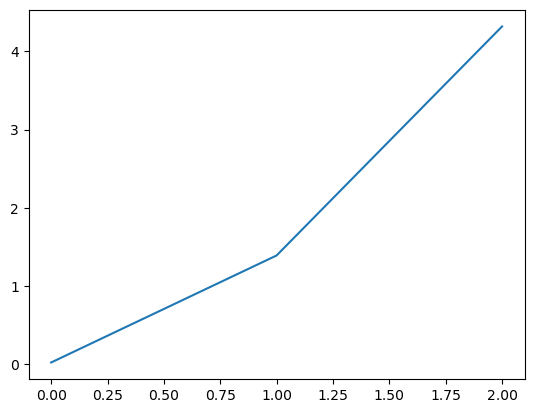

In [231]:
sim_s, sim_i = sol.y[:n,:], sol.y[n:,:]
plt.plot(sol.t, sim_i[0])
plt.show()